# <span style="color:darkred">  Esercitazione 9 </span>

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Apply your code to the optimization of a path among 

- 32 cities randomly placed **on** a circumference
- 32 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path

________________________
##### Svolgimento

Ho preparato la simulazione in maniera tale che l'ottimizzazione del percorso avvenisse su una popolazione di 100 elementi. Per raggiungere la convergenza ad un risultato ottimale la popolazione evolve lungo un periodo di 20000 steps (nella seconda simulazione le misure sono state prese fino a 30000 steps ma non era necessario). 
L'evoluzione consiste in un processo dove possono avvenire i seguenti eventi:
   * Crossover: con una probabilità del 70%  vengono scelti padre e madre, che generano tramite un crossover di larghezza variabile due figli. I figli andranno a sostituire i due percorsi nella popolazione con lunghezza maggiore.
   * Mutazioni: estratti random un numero di elementi nel range $[0, Ntot/4]$, con probabilità del 10% vengono eseguite per delle mutazioni (la scelta della mutazione viene applicata 2 volte, in maniera da favorire delle mutazioni miste). La mutazione andrà poi a sostituire l'elemento di lunghezza maggiore.
   
Le mutazioni possibili sono:
   * PairPermutation: scambio due elementi tra di loro.
   * BlockPermutation: scambio due blocchi di elementi contigui di grandezza M < Ntot/2.
   * Shift: sposto tutti gli elementi di un certo numero varibile. 
   
Per le città ho utilizzato nel primo caso una circonferenza di raggio unitario, mentre nel secondo caso un quadrato di lato 1.

In [2]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### 32 cities randomly placed on a circumference

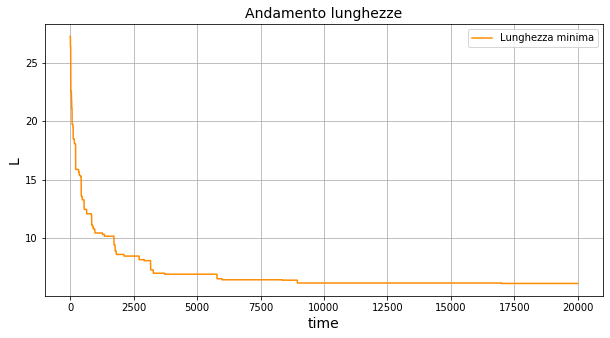

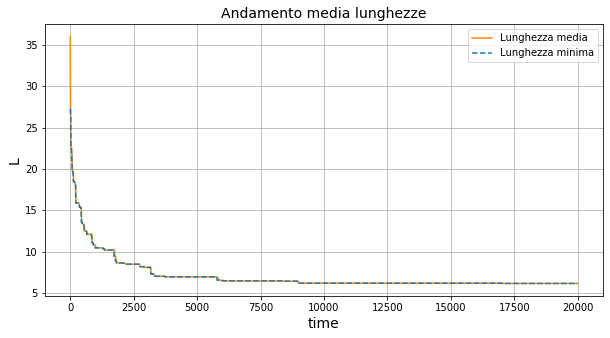

In [3]:
t, l = np.loadtxt("Es01\lunghezze.dat", usecols=(0,1), delimiter='   ', unpack='true')
tm, lm = np.loadtxt("Es01\mediaL.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.figure(1, figsize=(10,5))
plt.plot(t, l, color='darkorange', label = 'Lunghezza minima')
plt.title('Andamento lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.legend()
plt.grid(True)

plt.figure(2, figsize=(10,5))
plt.plot(tm, lm, color='darkorange', label = 'Lunghezza media')
plt.plot(t, l, linestyle = "--", label = 'Lunghezza minima')
plt.title('Andamento media lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.legend()
plt.grid(True)

plt.show()

Nei grafici sopra è mostrato l'andamento della lunghezza minima e media in funzione del numero dei passi per il percorso di 32 città posizionate su una circonferenza di raggio 1. La media è fatta sulla "metà migliore" della popolazione. Quello che si osserva è che la convergenza ad un valore minimo, che poi si verificherà essere il valore del minimo globale, avviene in tempi brevi, con t < 10000 steps. In verità a t = 10000, non è ancora stato raggiunto il vero e proprio minimo, si hanno delle differenze di lunghezze dell'ordine di +0,03 dal minimo globale. Ho quindi ritenuto necessario, per sicurezza procedere un t_Tot = 200000, visto che il tempo di esecuzione era sotto al minuto.

Dal grafico sulla media si osserva che quasi subito la metà della popolazione raggiunge una lunghezza media che è uguale alla lunghezza minima della popolazione. 

Il percorso ottimizzato ha una lunghezza $L = 6.138$. 

Di seguito viene mostrato la mappa del percorso migliore, confrontata con la mappa a 10000 steps.

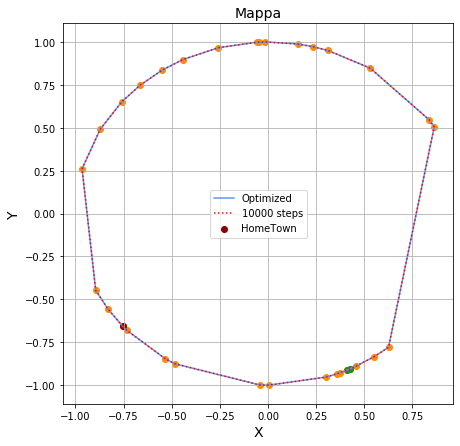

In [4]:
x, y = np.loadtxt("Es01\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')
x1, y1 = np.loadtxt("Es01\mappa10.dat", usecols=(1,2), delimiter='   ', unpack='true')

plt.figure(1, figsize=(7,7))
plt.scatter(x, y, color='darkorange')
plt.scatter(x[0], y[0], color='darkred', label = "HomeTown")
plt.scatter(x[22], y[22], color='forestgreen')
plt.scatter(x[23], y[23], color='forestgreen')
plt.plot(x, y, color='cornflowerblue', label = "Optimized")
plt.plot(x, y, linestyle = "dotted" ,color='red', label = "10000 steps")
plt.title('Mappa',fontsize= 14)
plt.xlabel('X',fontsize= 14)
plt.ylabel('Y', fontsize= 14)
plt.legend()
plt.grid(True)

plt.show()

Dall'immagine i due percorsi sembrerebbero uguali, in verità c'è un intreccio dove ci sono le città verdi. 

#### 32 cities randomly placed inside a square

Nei prossimi grafici è mostrato l'andamento della lunghezza minima e media in funzione del numero dei passi per il percorso di 32 città posizionate all'interno di un quadrato. Anche in questo caso la media è fatta sulla "metà migliore" della popolazione.


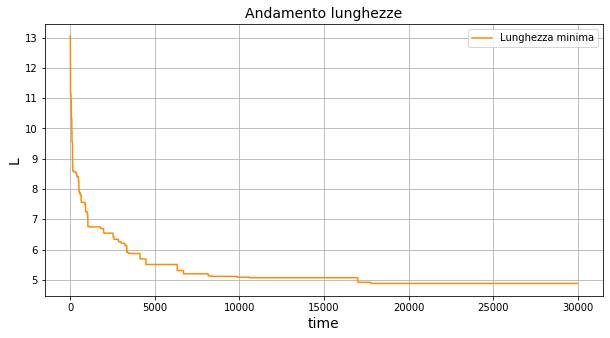

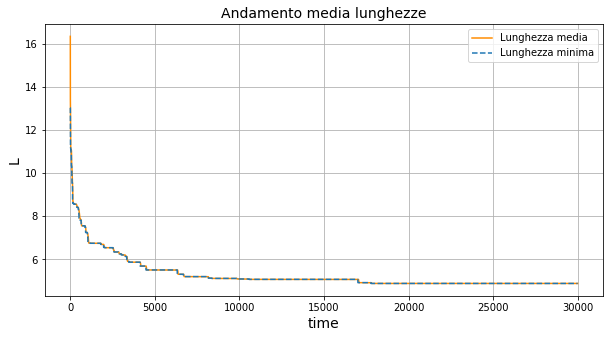

In [5]:
t, l = np.loadtxt("Es02\lunghezze.dat", usecols=(0,1), delimiter='   ', unpack='true')
tm, lm = np.loadtxt("Es02\mediaL.dat", usecols=(0,1), delimiter='   ', unpack='true')

plt.figure(1, figsize=(10,5))
plt.plot(t, l, color='darkorange', label = 'Lunghezza minima')
plt.title('Andamento lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.legend()
plt.grid(True)

plt.figure(2, figsize=(10,5))
plt.plot(tm, lm, color='darkorange', label = 'Lunghezza media')
plt.plot(t, l, linestyle = "--", label = 'Lunghezza minima')
plt.title('Andamento media lunghezze',fontsize= 14)
plt.xlabel('time',fontsize= 14)
plt.ylabel('L', fontsize= 14)
plt.legend()
plt.grid(True)

plt.show()

Quello che si osserva è che la convergenza ad un valore minimo, che poi si verificherà **non** essere il valore del minimo globale, avviene in tempi maggiori rispetto a prima, con t = 20000 steps. Ho verificato con simulazioni più lunghe (t = 100.000) che a t = 20000 steps il minimo locale era stato raggiunto. Il grafico arriva a 30000 steps per fare osservare bene la convergenza.

Anche in questo caso si osserva che quasi subito la metà della popolazione raggiunge una lunghezza media che è uguale alla lunghezza minima della popolazione.

Il percorso ottimizzato ha una lunghezza  $L = 4.88006$.

Di seguito viene mostrato la mappa del percorso migliore.

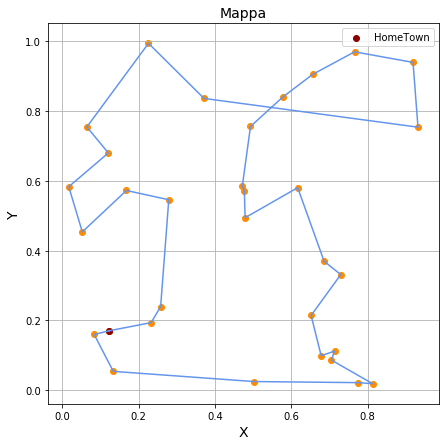

In [6]:
x, y = np.loadtxt("Es02\mappa.dat", usecols=(1,2), delimiter='   ', unpack='true')

plt.figure(1, figsize=(7,7))
plt.scatter(x, y, color='darkorange')
plt.scatter(x[0], y[0], color='darkred', label = "HomeTown")
plt.plot(x, y, color='cornflowerblue')
plt.title('Mappa',fontsize= 14)
plt.xlabel('X',fontsize= 14)
plt.ylabel('Y', fontsize= 14)
plt.legend()
plt.grid(True)

plt.show()